<a href="https://colab.research.google.com/github/VielF/ColabProjects/blob/main/Exemplo_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network (CNN)

Exemplo retirado do site da Tensorflow e Keras

Este tutorial demonstra o treinamento de uma [Rede Neural Convolucional](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) simples para classificar [imagens CIFAR](https://www.cs.toronto.edu/~kriz/cifar.html). Como este tutorial usa a [API Sequencial Keras](https://www.tensorflow.org/guide/keras/overview), criar e treinar seu modelo levará apenas algumas linhas de código.



### Import TensorFlow

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Baixe e prepare o conjunto de dados CIFAR10


O conjunto de dados CIFAR10 contém 60.000 imagens coloridas em 10 classes, com 6.000 imagens em cada classe. O conjunto de dados é dividido em 50.000 imagens de treinamento e 10.000 imagens de teste. As classes são mutuamente exclusivas e não há sobreposição entre elas.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 6s 0us/step


### Verifique os dados

Para verificar se o conjunto de dados está correto, vamos traçar as primeiras 25 imagens do conjunto de treinamento e exibir o nome da classe abaixo de cada imagem:


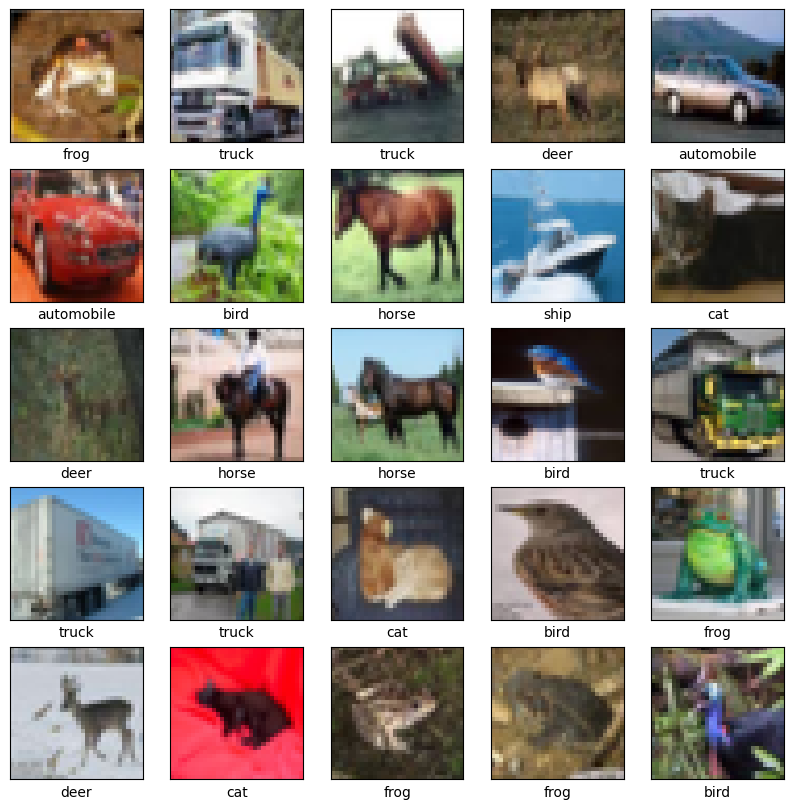

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Crie a base convolucional

As 6 linhas de código abaixo definem a base convolucional usando um padrão comum: uma pilha de [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) e [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) camadas.

Como entrada, uma CNN recebe tensores de forma (image_height, image_width, color_channels), ignorando o tamanho do lote. Se você é novo nessas dimensões, color_channels refere-se a (R,G,B). Neste exemplo, você configurará sua CNN para processar entradas de formato (32, 32, 3), que é o formato das imagens CIFAR. Você pode fazer isso passando o argumento `input_shape` para sua primeira camada.


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Vamos exibir a arquitetura do seu modelo até agora:

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

Acima, você pode ver que a saída de cada camada Conv2D e MaxPooling2D é um tensor 3D de forma (altura, largura, canais). As dimensões de largura e altura tendem a encolher à medida que você se aprofunda na rede. O número de canais de saída para cada camada Conv2D é controlado pelo primeiro argumento (por exemplo, 32 ou 64). Normalmente, à medida que a largura e a altura diminuem, você pode permitir (computacionalmente) adicionar mais canais de saída em cada camada Conv2D.

### Adicione camadas densas no topo

Para completar o modelo, você alimentará o último tensor de saída da base convolucional (da forma (4, 4, 64)) em uma ou mais camadas densas para realizar a classificação. As camadas densas recebem vetores como entrada (que são 1D), enquanto a saída atual é um tensor 3D. Primeiro, você achatará (ou desenrolará) a saída 3D para 1D e, em seguida, adicionará uma ou mais camadas densas no topo. CIFAR tem 10 classes de saída, então você usa uma camada densa final com 10 saídas.

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Aqui está a arquitetura completa do seu modelo:

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

O resumo da rede mostra que (4, 4, 64) as saídas foram achatadas em vetores de forma (1024) antes de passar por duas camadas densas.

### Compile and train the model

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 24s 6ms/step - loss: 1.5183 - accuracy: 0.4450 - val_loss: 1.2399 - val_accuracy: 0.5588
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1468 - accuracy: 0.5941 - val_loss: 1.0409 - val_accuracy: 0.6282
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9986 - accuracy: 0.6469 - val_loss: 1.0195 - val_accuracy: 0.6437
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9068 - accuracy: 0.6817 - val_loss: 0.9496 - val_accuracy: 0.6680
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8387 - accuracy: 0.7039 - val_loss: 0.8677 - val_accuracy: 0.6945
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7804 - accuracy: 0.7273 - val_loss: 0.8551 - val_accuracy: 0.7019
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7323 - accuracy: 0.7440 - val_loss: 0.8429 - val_accura

### Avalie o modelo

313/313 - 1s - loss: 0.8707 - accuracy: 0.7073 - 670ms/epoch - 2ms/step


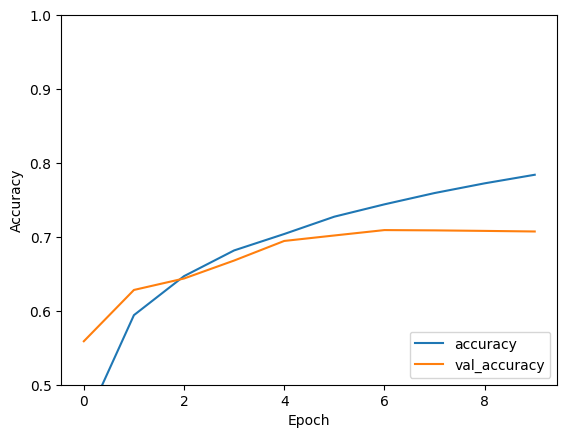

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [10]:
print(test_acc)

0.7073000073432922


Sua CNN simples alcançou uma precisão de teste de mais de 70%. Nada mal para algumas linhas de código! Para outro estilo de CNN, confira o exemplo de [início rápido do TensorFlow 2 para especialistas](https://www.tensorflow.org/tutorials/quickstart/advanced) que usa a API de subclasse Keras e `tf.GradientTape`.

## Testa o modelo imagem por imagem

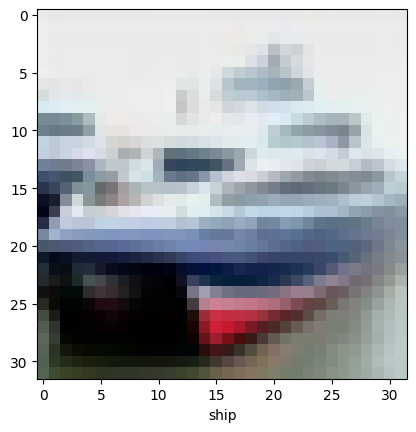

1/1 [==============================] - 0s 195ms/step
[[ 2.1599889  4.317048  -3.316448  -3.8842988 -7.724388  -7.871253
  -2.6648219 -8.069942   6.5628915 -0.9528474]]


In [11]:
import numpy as np
num_image = 1
plt.imshow(test_images[num_image])
plt.xlabel(class_names[test_labels[num_image][0]])
plt.show()
image2test = test_images[num_image]
image2test = image2test.reshape((-1,32,32,3))
print(model.predict(image2test))
#['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
#     0            1           2      3       4     5       6        7       8       9